In [1]:
# run this on top of all of Your notebooks -- it does all the dirty imports.
exec(open('initialize_jupyter_handybeam.py').read())
import strathclyde

In [6]:
array_builder=strathclyde.LinearArray()

In [142]:
importlib.reload(strathclyde)
array_builder=strathclyde.LinearArray(
    radiation_frequency=40e3,
    sound_velocity=343,
    sampling_density=17,
    passive_aperture=64e-3,
    element_pitch=4.0e-3,
    element_width=None,
    element_count=16,
    focal_point=(0.0e-3,10.0e-3,50e-3))
array_builder

Basic linear probe:
> Environment:
>>   radiation frequency: 40.0kHz
>>   sound_velocity :343.0m/s
>>   sound wave length :8.575mm
>>   medium wavenumber: 116.6[waves/meter]
>>   point sources sampling density: 17pt/lambda linear, spacing of 0.504mm
  
> Probe definition:
>>   Passive aperture: 64.0mm
>>   element width: 2.000mm
>>   element count: 16
  
> Probe calculated properties:
>>   inter-element gap: 2.0mm
>>   Active aperture: 64.0mm
>>   Active aperture near field transition: 119.4mm
>>   Passive aperture near field transition: 119.4mm
>>   Active aperture near field transition: 119.4mm
  
> Focal point calculated properties:
>>   focal distance: 51.0mm
>>   active aperture -6dB focal spot size: 7.0mm
>>   passive aperture -6dB natural focus spot size: 16.3mm

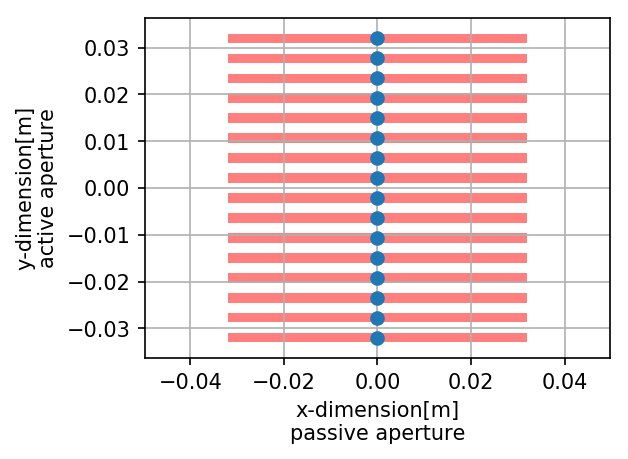

In [22]:
array_builder.visualize_array_elements() # visualize with output to screen
array_builder.visualize_array_elements(filename='example_visualize_array_elements.png') # save figure to disk

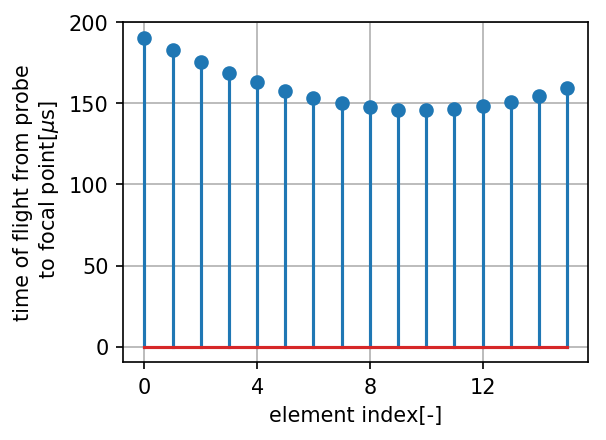

In [23]:
array_builder.visualize_time_of_flight() # visualize with output to screen
array_builder.visualize_time_of_flight(filename='example_visualize_time_of_flight.png') # save figure to disk

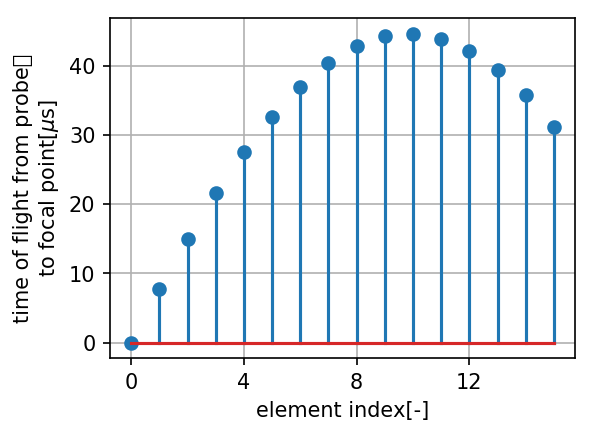

In [24]:
array_builder.visualize_focal_laws()
array_builder.visualize_focal_laws(filename='example_visualize_focal_laws.png')

In [19]:
print(array_builder.export_focal_laws_to_onscale(filename="onscale_focal_laws.txt"))


symb tshift0 = 0.000000e+00
symb eweight0 = 1.000000e+00
symb tshift1 = 7.752282e-06
symb eweight1 = 1.000000e+00
symb tshift2 = 1.496422e-05
symb eweight2 = 1.000000e+00
symb tshift3 = 2.156654e-05
symb eweight3 = 1.000000e+00
symb tshift4 = 2.748511e-05
symb eweight4 = 1.000000e+00
symb tshift5 = 3.264294e-05
symb eweight5 = 1.000000e+00
symb tshift6 = 3.696327e-05
symb eweight6 = 1.000000e+00
symb tshift7 = 4.037373e-05
symb eweight7 = 1.000000e+00
symb tshift8 = 4.281122e-05
symb eweight8 = 1.000000e+00
symb tshift9 = 4.422705e-05
symb eweight9 = 1.000000e+00
symb tshift10 = 4.459145e-05
symb eweight10 = 1.000000e+00
symb tshift11 = 4.389657e-05
symb eweight11 = 1.000000e+00
symb tshift12 = 4.215731e-05
symb eweight12 = 1.000000e+00
symb tshift13 = 3.940976e-05
symb eweight13 = 1.000000e+00
symb tshift14 = 3.570764e-05
symb eweight14 = 1.000000e+00
symb tshift15 = 3.111752e-05
symb eweight15 = 1.000000e+00



In [25]:
handybeam_world=array_builder.create_handybeam_world()

AttributeError: 'LinearArray' object has no attribute 'create_handybeam_world'

# -=========== FRONTIER ============
Things below this line need development  ------



In [194]:
importlib.reload(strathclyde)

array_builder=strathclyde.LinearArray(sampling_density=60,element_width=0.3e-3)
#q=array_builder.create_point_cloud_for_array_element(passive_aperture=5e-3,active_aperture=3e-3,element_position=np.array((0,0,0)))
q=array_builder.create_point_cloud_all_elements()
q

array([[-0.006     , -0.00815   ,  0.        , ...,         nan,
                nan,         nan],
       [-0.00585542, -0.00815   ,  0.        , ...,         nan,
                nan,         nan],
       [-0.00571084, -0.00815   ,  0.        , ...,         nan,
                nan,         nan],
       ...,
       [ 0.00571084,  0.00815   ,  0.        , ...,         nan,
                nan,         nan],
       [ 0.00585542,  0.00815   ,  0.        , ...,         nan,
                nan,         nan],
       [ 0.006     ,  0.00815   ,  0.        , ...,         nan,
                nan,         nan]])

In [201]:
q[800,:]

array([ 3.61445783e-04, -4.95000000e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  0.00000000e+00,  1.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.00000000e+00,  7.49910756e-02,
                   nan,             nan,             nan,             nan])

In [196]:
array_builder.focal_laws_delays

array([[0.00000000e+00],
       [1.16018538e-07],
       [2.15481364e-07],
       [2.98380009e-07],
       [3.64707410e-07],
       [4.14457911e-07],
       [4.47627270e-07],
       [4.64212657e-07],
       [4.64212657e-07],
       [4.47627270e-07],
       [4.14457911e-07],
       [3.64707410e-07],
       [2.98380009e-07],
       [2.15481364e-07],
       [1.16018538e-07],
       [0.00000000e+00]])

In [197]:
array_builder.focal_laws_phases

array([[0.        ],
       [0.02915864],
       [0.05415637],
       [0.07499108],
       [0.09166097],
       [0.10416463],
       [0.112501  ],
       [0.11666937],
       [0.11666937],
       [0.112501  ],
       [0.10416463],
       [0.09166097],
       [0.07499108],
       [0.05415637],
       [0.02915864],
       [0.        ]])

In [198]:
array_builder.focal_laws_gains

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [199]:
q.shape

(4032, 16)

(-0.0066, 0.0066, -0.008965, 0.008965)

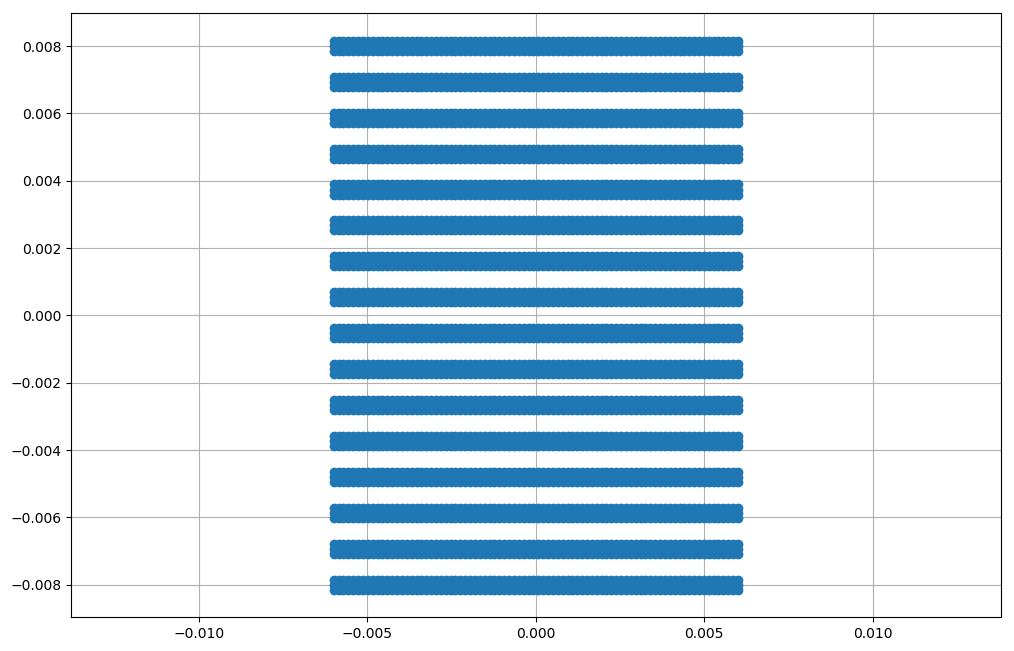

In [202]:
plt.figure(figsize=(12,8),dpi=100)
plt.plot(q[:,0],q[:,1],'o')
plt.grid(True)
plt.axis('equal')

array([[-0.006     , -0.00825   ,  0.        ],
       [-0.00572727, -0.00825   ,  0.        ],
       [-0.00545455, -0.00825   ,  0.        ],
       ...,
       [ 0.00545455,  0.00825   ,  0.        ],
       [ 0.00572727,  0.00825   ,  0.        ],
       [ 0.006     ,  0.00825   ,  0.        ]])

In [128]:
element_locations = array_builder.element_centre_locations

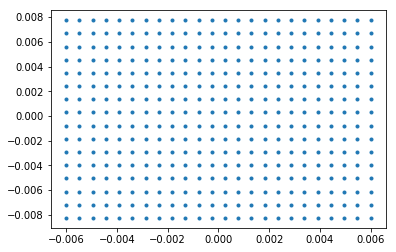

In [141]:
point_list = np.empty((0, 3))
for idx_element in range(array_builder.element_count):
    point_list = np.concatenate((point_list,
        array_builder.create_point_cloud_for_array_element(
            passive_aperture=array_builder.passive_aperture,
            active_aperture=array_builder.element_width,
            element_position=element_locations[idx_element, :]
        )))
plt.plot(point_list[:,0],point_list[:,1],'.')

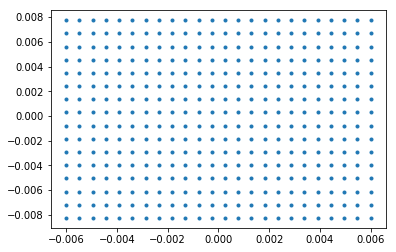

In [78]:
coordinate_of_points_along_x = np.linspace(
    -passive_aperture / 2 + element_position[0],
    passive_aperture / 2 + element_position[0],
    count_of_points_along_x)

C:\Users\JerzyDziewierz\AppData\Local\conda\conda\envs\handybeam\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


In [77]:
q.size

4

In [72]:
q

array([-0.001     , -0.00033333,  0.00033333,  0.001     ])

In [73]:
# Intialise the world.

world = handybeam.world.World(frequency = 40000, sound_velocity = 343)
world

world = handybeam.world.World(frequency = 40000, sound_velocity = 343)
handybeam.world.World() with sound velocity of 343.0m/s, frequency 40.0kHz, medium_wavelength of 8.575mm, wavenumber 116.618, 0 sampler(s)
Tx array: fully sampled rectilinear, parametrized with element_count=256; 

In [13]:
# Add a transmitter array to the world.

#world.tx_array = handybeam.tx_array_library.rectilinear(parent = world)
world.tx_array = handybeam.tx_array_library.\
    simple_linear(parent = world,element_count=16,element_pitch=7.5e-3 )
world.tx_array

this = TxArray(parent)
name string: a line of elements, starting at xyz=0, along y, spaced by 7.5mm
count of elements: 16

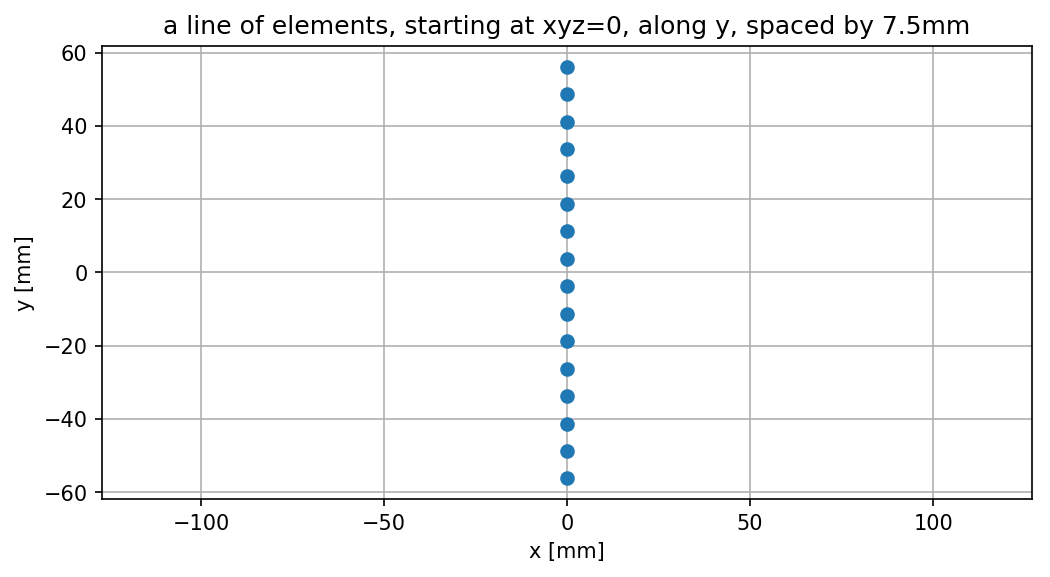

In [14]:
world.tx_array.visualise()

In [15]:
# Set grid spacing per wavelength for rectilinear sampling grid.

grid_spacing_per_wavelength = 0.1

# Set grid extent around the origin.

grid_extent_around_origin_x = 0.2
grid_extent_around_origin_y = 0.2

# Set plane height 

focal_plane_height = 200e-3

In [16]:
# Add a rectilinear sampling grid to the world.

rectilinear_sampler = \
    world.add_sampler(
    handybeam.samplers.rectilinear_sampler.RectilinearSampler(
        parent = world,
        origin = np.array((0,0,focal_plane_height)),
        grid_spacing_per_wavelength = grid_spacing_per_wavelength,
        grid_extent_around_origin_x = grid_extent_around_origin_x,
        grid_extent_around_origin_y = grid_extent_around_origin_y,
        normal_vector=np.array((1,0,0)),
        parallel_vector=np.array((0,-1,0)),
        local_work_size=(1,1,1)
    ))

In [17]:
rectilinear_sampler.propagate()

In [18]:
rectilinear_sampler

RectilinearSampler: 467x467 points, spacing 0.857mm

In [19]:
# Note: Add a new SampledLinearTxArray class, deriving from a TxArray class
# with the following properties:
#* 
# *  Private method to calculate focal laws, includes apodisation
#* sampled large array elements (multiple simulation points per array element)
# * private visualizer

In [20]:
# Initialise solver object.

solver = handybeam.solver.Solver(parent = world)

In [21]:
# Instruct the solver to solve for the activation coefficients.

solver.single_focus_solver(x_focus = 0.00, y_focus = 0, z_focus = focal_plane_height) 


In [22]:
# Propagate the acoustic field

world.propagate(print_performance_feedback=True)

profiling: info:
profiling: wall time: 0.0243[sec] == 41.1[FPS]
profiling: kernel time : 20541.4[us] == 48.7[FPS]
profiling: compute performance: 169.9[MRays/sec]
profiling: memcopy time: 1958.7[us] == 510.5[FPS]
profiling: memcopy bandwidth: 2.1[GB/sec]
profiling: command bandwidth: 153186.3[CPS]


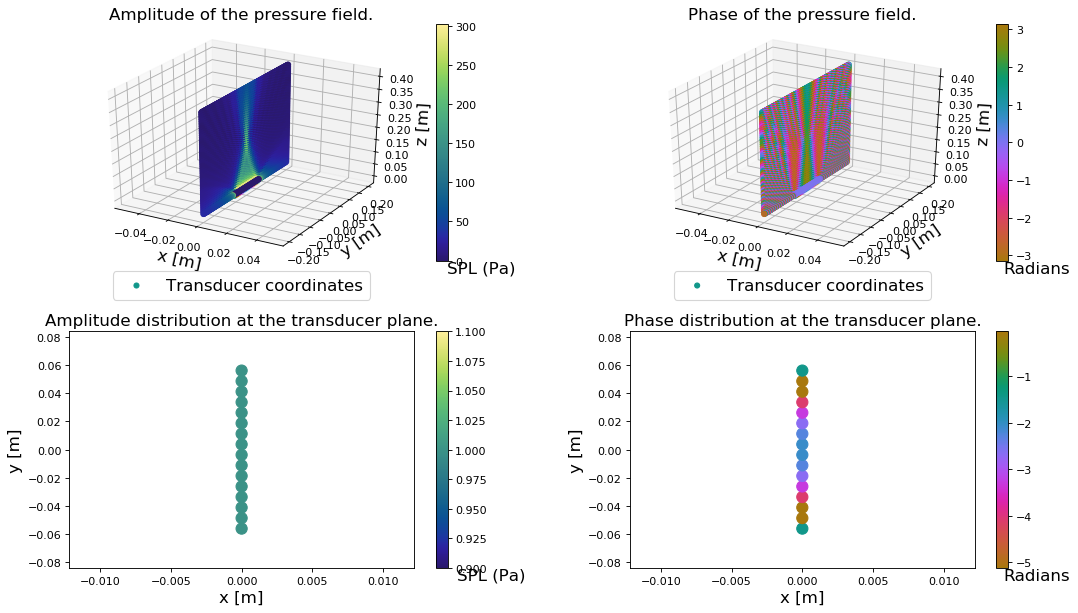

In [23]:
# Visualise the result

rectilinear_sampler.visualise_all_in_one()

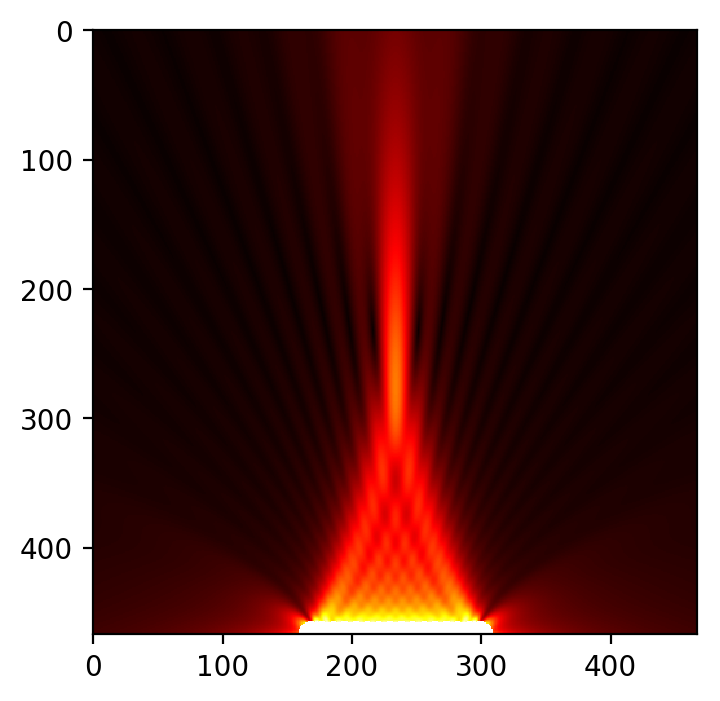

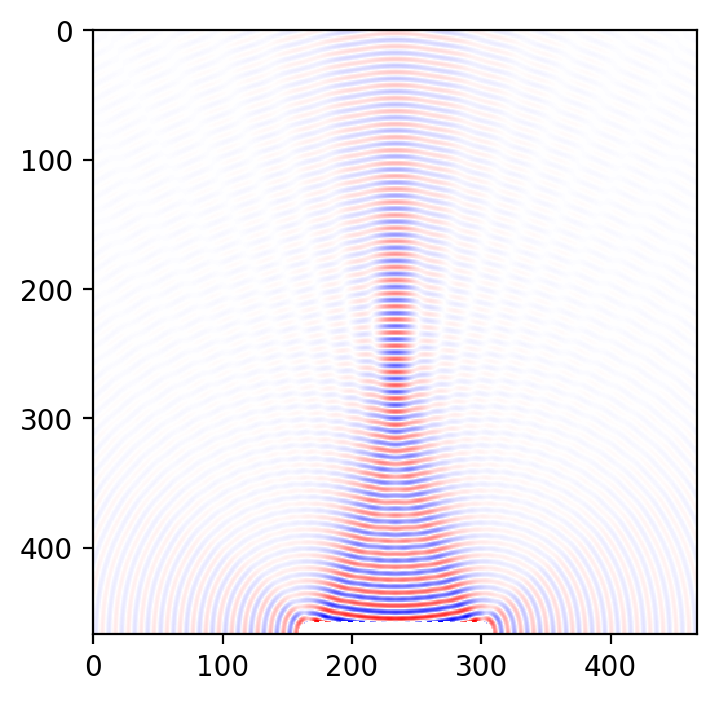

In [24]:
plt.figure(figsize=(8,4),dpi=200)
plt.imshow(np.abs(rectilinear_sampler.pressure_field),cmap='hot')
plt.figure(figsize=(8,4),dpi=200)
plt.imshow(np.real(rectilinear_sampler.pressure_field),cmap='bwr')

In [25]:
import handybeam.cl_system

In [26]:
handybeam.cl_system.print_cl_platforms()

------------
platform: 0, name = NVIDIA CUDA
--- platform 0, device 0 : name= GeForce GTX 1070 with Max-Q Design
------------
platform: 1, name = Intel(R) OpenCL
--- platform 1, device 0 : name= Intel(R) UHD Graphics 630
--- platform 1, device 1 : name= Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz


In [24]:
world

world = handybeam.world.World(frequency = 40000, sound_velocity = 343)
handybeam.world.World() with sound velocity of 343.0m/s, frequency 40.0kHz, medium_wavelength of 8.575mm, wavenumber 116.618, 1 sampler(s)
sampler 0: RectilinearSampler: 467x467 points, spacing 0.857mm
Tx array: a line of elements, starting at xyz=0, along y, spaced by 7.5mm

In [118]:
np.empty((0,3))

array([], shape=(0, 3), dtype=float64)

In [165]:
np.ones(shape=(3,1))

array([[1.],
       [1.],
       [1.]])

In [166]:
point_nan_list = np.fill(np.empty(shape=(4,1)), np.NaN)

AttributeError: module 'numpy' has no attribute 'fill'